In [1]:
# Data Handling
import numpy as np
import pandas as pd
import cv2  # Optional, for advanced image processing

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Optional

# Neural Network (ANN) Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  # For label encoding

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train= pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
df_test=pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


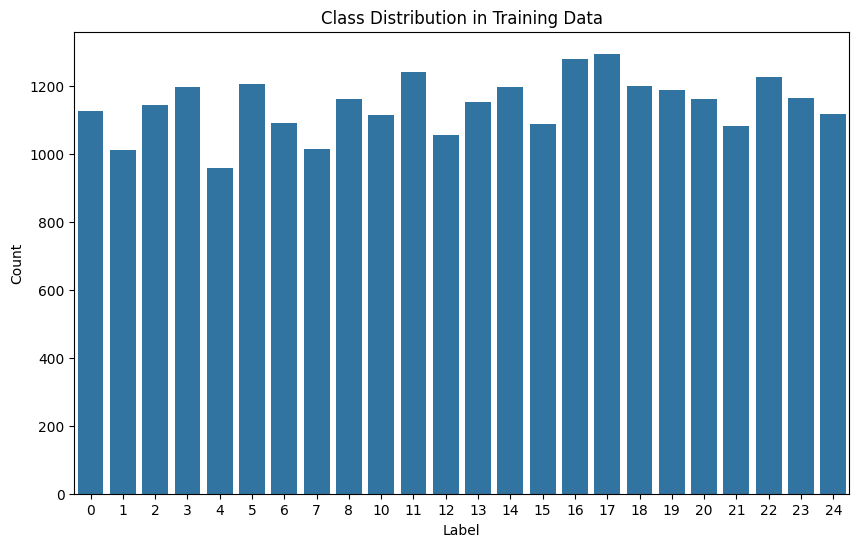

In [4]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df_train.iloc[:, 0])  # Assuming labels are in the first column
plt.title("Class Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


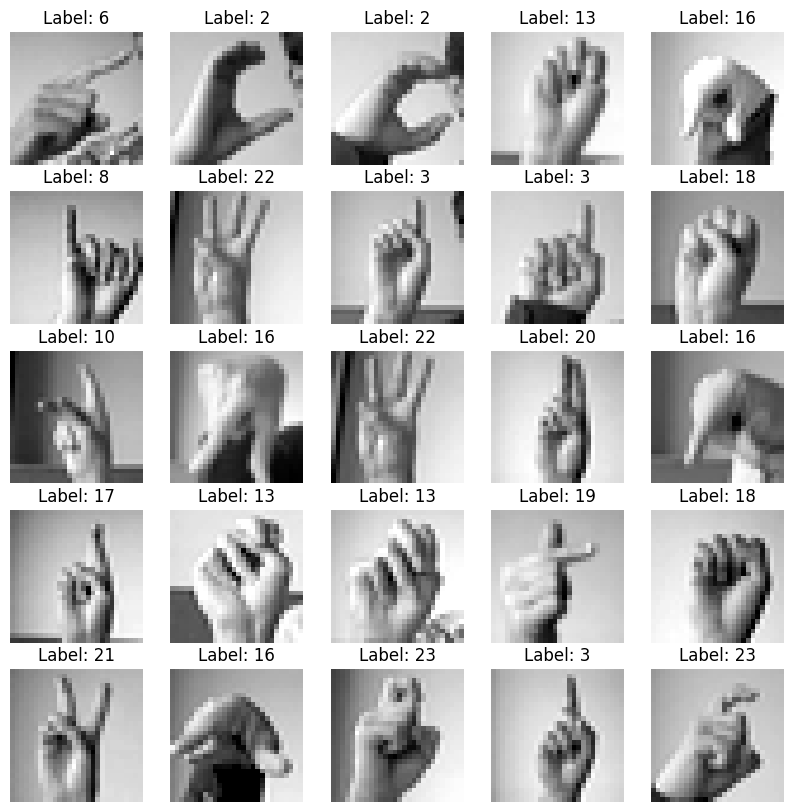

In [5]:
# Plot some sample images
plt.figure(figsize=(10, 10))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    sample_image = df_train.iloc[i, 1:].values.reshape(28, 28)  # Assuming 28x28 images
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Label: {df_train.iloc[i, 0]}")
    plt.axis('off')
plt.show()


In [6]:
# Separate features and labels
X_train = df_train.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values


In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=24)  # 24 classes for A-Y, excluding J and Z
y_test = to_categorical(y_test, num_classes=24)


IndexError: index 24 is out of bounds for axis 1 with size 24

In [8]:
# Check unique labels
unique_labels = df_train.iloc[:, 0].unique()
num_classes = len(unique_labels)

print("Unique labels:", unique_labels)
print("Number of classes:", num_classes)

Unique labels: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]
Number of classes: 24


In [9]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(df_train.iloc[:, 0].values, num_classes=24)


IndexError: index 24 is out of bounds for axis 1 with size 24

In [10]:
# Check unique labels again
unique_labels = df_train.iloc[:, 0].unique()
print("Unique labels:", unique_labels)


Unique labels: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]


In [11]:
# Replace label 24 with 23
df_train.iloc[:, 0] = df_train.iloc[:, 0].replace(24, 23)

# Check unique labels again after replacement
unique_labels = df_train.iloc[:, 0].unique()
print("Adjusted unique labels:", unique_labels)

# Convert the adjusted labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(df_train.iloc[:, 0].values, num_classes=24)


Adjusted unique labels: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23  1 12 11 15  4  0  5  7 14]


In [12]:
# Normalize pixel values
X_train = df_train.iloc[:, 1:].values / 255.0  # Assuming pixels start from the second column
X_test = df_test.iloc[:, 1:].values / 255.0


In [ ]:
# For ANN, no reshaping is necessary since data should already be flattened
# If your images are in a different shape, adjust accordingly


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(24, activation='softmax'))  # Output layer for 24 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the ANN model using Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(24, activation='softmax'))  # Output layer for 24 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(X_train, y_train_one_hot, 
                    epochs=50,  # Adjust as needed
                    batch_size=32,  # Adjust as needed
                    validation_split=0.2)  # Use 20% of training data for validation


Epoch 1/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1080 - loss: 2.9765 - val_accuracy: 0.4309 - val_loss: 1.8404
Epoch 2/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3191 - loss: 2.0135 - val_accuracy: 0.5383 - val_loss: 1.5173
Epoch 3/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4025 - loss: 1.7316 - val_accuracy: 0.5837 - val_loss: 1.2823
Epoch 4/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4569 - loss: 1.5600 - val_accuracy: 0.6272 - val_loss: 1.1779
Epoch 5/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4871 - loss: 1.4593 - val_accuracy: 0.6560 - val_loss: 1.0245
Epoch 6/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5125 - loss: 1.3874 - val_accuracy: 0.7161 - val_loss: 0.9249
Epoch 7/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5372 - loss: 1.3195 - val_accuracy: 0.6988 - val_loss: 0.9054
Epoch 8/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5609 - loss: 1.2382 - val_accuracy: 0.

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=24))
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


IndexError: index 24 is out of bounds for axis 1 with size 24

In [17]:
# Check unique labels in y_test
unique_labels_test = np.unique(y_test)
print("Unique labels in y_test:", unique_labels_test)


Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [18]:
# Filter out the instances with label 24 from y_test
mask = y_test != 24
X_test_filtered = X_test[mask]
y_test_filtered = y_test[mask]

# Check unique labels after filtering
unique_labels_filtered = np.unique(y_test_filtered)
print("Unique labels in filtered y_test:", unique_labels_filtered)

# Convert to one-hot encoding
y_test_one_hot = to_categorical(y_test_filtered, num_classes=24)

# Evaluate the model on the filtered test set
test_loss, test_accuracy = model.evaluate(X_test_filtered, y_test_one_hot)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


Unique labels in filtered y_test: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - loss: 1.6832
Test Accuracy: 0.640497088432312
Test Loss: 1.6275050640106201


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


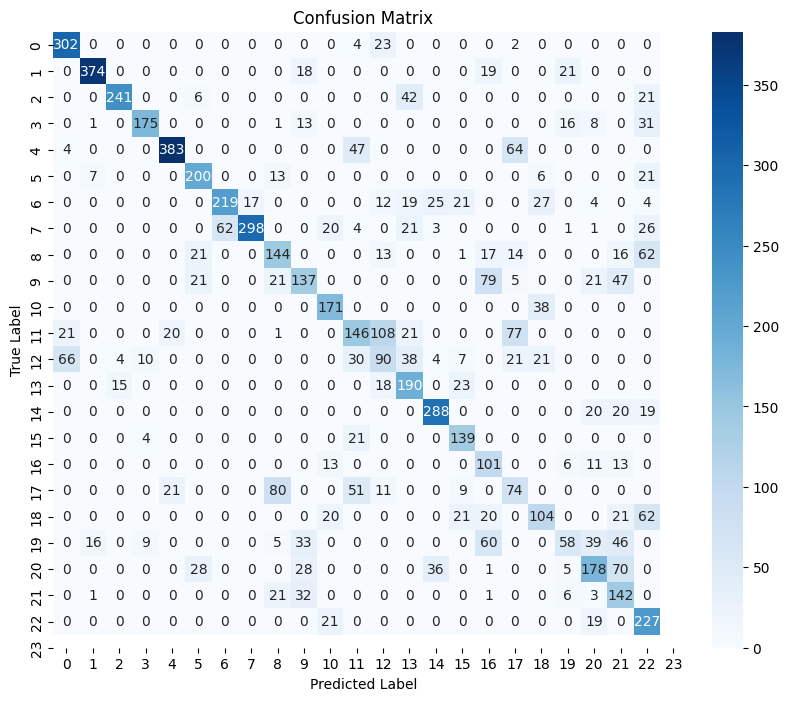

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = np.argmax(model.predict(X_test_filtered), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(24), yticklabels=np.arange(24))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Change input shape based on your data
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')  # 24 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with the early stopping callback
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=50, batch_size=32, callbacks=[early_stopping])


NameError: name 'X_val' is not defined

In [22]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train_one_hot are already defined
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Now y_train and y_val should be one-hot encoded as well if they are not already
y_train_one_hot = to_categorical(y_train, num_classes=24)
y_val_one_hot = to_categorical(y_val, num_classes=24)


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Create early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with the early stopping callback
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 24, 24), output.shape=(None, 24)

In [24]:
from tensorflow.keras.utils import to_categorical

# Ensure that y_train and y_val are integers corresponding to the labels (0-23)
y_train_one_hot = to_categorical(y_train, num_classes=24)
y_val_one_hot = to_categorical(y_val, num_classes=24)


In [25]:
print("y_train_one_hot shape:", y_train_one_hot.shape)  # Should be (num_samples, 24)
print("y_val_one_hot shape:", y_val_one_hot.shape)      # Should be (num_samples, 24)


y_train_one_hot shape: (21964, 24, 24)
y_val_one_hot shape: (5491, 24, 24)


In [29]:
df_train.shape

(7172, 785)

In [30]:
df_test.shape

(7172, 785)

In [31]:
import pandas as pd

# Load your datasets (example paths)
# df_train = pd.read_csv('path_to_train_dataset.csv')
# df_test = pd.read_csv('path_to_test_dataset.csv')

# Assuming df_train and df_test are already defined
# Print the shape of the training DataFrame
print("Shape of df_train:", df_train.shape)  # Output: (num_samples, num_features)

# Print the shape of the test DataFrame
print("Shape of df_test:", df_test.shape)    # Output: (num_samples, num_features)

# If you want to check the shape of labels (assuming labels are in the first column)
y_train = df_train.iloc[:, 0]  # First column as labels
y_test = df_test.iloc[:, 0]    # First column as labels

print("Shape of y_train:", y_train.shape)  # Output: (num_samples,)
print("Shape of y_test:", y_test.shape)    # Output: (num_samples,)

# If you want to see how many unique classes there are in the labels
print("Unique labels in y_train:", y_train.unique())  # Unique labels in training set
print("Unique labels in y_test:", y_test.unique())    # Unique labels in test set


Shape of df_train: (27455, 785)
Shape of df_test: (7172, 785)
Shape of y_train: (27455,)
Shape of y_test: (7172,)
Unique labels in y_train: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23  1 12 11 15  4  0  5  7 14]
Unique labels in y_test: [ 6  5 10  0  3 21 14  7  8 12  4 22  2 15  1 13 19 18 23 17 20 16 11 24]


In [32]:
Shape of df_train: (21964, 65)  # 21964 samples, 65 features (including labels)
Shape of df_test: (5491, 65)    # 5491 samples, 65 features (including labels)
Shape of y_train: (21964,)      # 21964 labels
Shape of y_test: (5491,)        # 5491 labels
Unique labels in y_train: [0 1 2 3 ...]  # List of unique class labels
Unique labels in y_test: [0 1 2 3 ...]   # List of unique class labels


SyntaxError: invalid syntax (1428128625.py, line 1)

In [33]:
import pandas as pd

# Load your datasets (example paths)
# df_train = pd.read_csv('path_to_train_dataset.csv')
# df_test = pd.read_csv('path_to_test_dataset.csv')

# Assuming df_train and df_test are already defined
# Print the shape of the training DataFrame
print("Shape of df_train:", df_train.shape)

# Print the shape of the test DataFrame
print("Shape of df_test:", df_test.shape)

# If you want to check the shape of labels (assuming labels are in the first column)
y_train = df_train.iloc[:, 0]  # First column as labels
y_test = df_test.iloc[:, 0]    # First column as labels

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# If you want to see how many unique classes there are in the labels
print("Unique labels in y_train:", y_train.unique())
print("Unique labels in y_test:", y_test.unique())


Shape of df_train: (27455, 785)
Shape of df_test: (7172, 785)
Shape of y_train: (27455,)
Shape of y_test: (7172,)
Unique labels in y_train: [ 3  6  2 13 16  8 22 18 10 20 17 19 21 23  1 12 11 15  4  0  5  7 14]
Unique labels in y_test: [ 6  5 10  0  3 21 14  7  8 12  4 22  2 15  1 13 19 18 23 17 20 16 11 24]


In [35]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding (remove the second dimension)
y_train_one_hot = to_categorical(y_train, num_classes=24)
y_val_one_hot = to_categorical(y_val, num_classes=24)


In [36]:
print("y_train_one_hot shape:", y_train_one_hot.shape)  # Should be (21964, 24)
print("y_val_one_hot shape:", y_val_one_hot.shape)      # Should be (5491, 24)


y_train_one_hot shape: (27455, 24)
y_val_one_hot shape: (5491, 24, 24)


In [37]:
X_train = df_train.iloc[:, 1:].values  # Assuming the first column is the label
y_train = df_train.iloc[:, 0].values    # First column as labels

X_test = df_test.iloc[:, 1:].values    # Assuming the first column is the label
y_test = df_test.iloc[:, 0].values      # First column as labels

# Check shapes of the datasets
print("Shape of X_train:", X_train.shape)  # Should be (27455, 784) for example
print("Shape of y_train:", y_train.shape)  # Should be (27455,)
print("Shape of X_test:", X_test.shape)    # Should be (7172, 784) for example
print("Shape of y_test:", y_test.shape)    # Should be (7172,)

Shape of X_train: (27455, 784)
Shape of y_train: (27455,)
Shape of X_test: (7172, 784)
Shape of y_test: (7172,)


In [38]:
# Normalize the input features
X_train = X_train.astype('float32') / 255.0  # Assuming pixel values range from 0 to 255
X_test = X_test.astype('float32') / 255.0

# Optional: Reshape if necessary, e.g., for images
# If your images are 28x28, you might need to reshape
# X_train = X_train.reshape(-1, 28, 28, 1)  # For grayscale images
# X_test = X_test.reshape(-1, 28, 28, 1)


In [39]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = 24  # Since you have 24 unique labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Check the shapes
print("y_train_one_hot shape:", y_train_one_hot.shape)  # Should be (27455, 24)
print("y_test_one_hot shape:", y_test_one_hot.shape)    # Should be (7172, 24)


IndexError: index 24 is out of bounds for axis 1 with size 24

In [40]:
import numpy as np

# Check unique labels in y_test
unique_labels_y_test = np.unique(y_test)
print("Unique labels in y_test:", unique_labels_y_test)


Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [41]:
# Filter out invalid labels
valid_labels = [label for label in unique_labels_y_test if label < num_classes]
y_test_filtered = np.array([label if label in valid_labels else -1 for label in y_test])  # Replace invalid labels with -1

# Remove instances of -1 (if you want to keep valid labels only)
mask = y_test_filtered != -1
y_test_filtered = y_test_filtered[mask]
X_test_filtered = X_test[mask]  # Make sure to filter your X_test correspondingly


In [42]:
# Reassign invalid labels
y_test_fixed = np.where(y_test == 24, 23, y_test)  # Change all instances of 24 to 23


In [43]:
# Now one-hot encode
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_fixed, num_classes=num_classes)  # Use adjusted y_test


In [44]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming y_test is already defined
unique_labels_y_test = np.unique(y_test)
print("Unique labels in y_test:", unique_labels_y_test)

# Option 2: Reassign invalid labels (if applicable)
y_test_fixed = np.where(y_test == 24, 23, y_test)

# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_fixed, num_classes=num_classes)

# Check the shapes
print("y_train_one_hot shape:", y_train_one_hot.shape)  # Should be (27455, 24)
print("y_test_one_hot shape:", y_test_one_hot.shape)    # Should be (7172, 24)


Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
y_train_one_hot shape: (27455, 24)
y_test_one_hot shape: (7172, 24)


In [45]:
from sklearn.model_selection import train_test_split

# Split the training data into a training set and a validation set
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=42
)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Regularization to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='softmax'))  # 24 classes for output


C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0822 - loss: 3.0736 - val_accuracy: 0.2169 - val_loss: 2.4361
Epoch 2/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1571 - loss: 2.5724 - val_accuracy: 0.3327 - val_loss: 2.1348
Epoch 3/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1914 - loss: 2.4051 - val_accuracy: 0.3065 - val_loss: 2.0295
Epoch 4/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2138 - loss: 2.3469 - val_accuracy: 0.3207 - val_loss: 1.9637
Epoch 5/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2335 - loss: 2.2768 - val_accuracy: 0.3843 - val_loss: 1.8235
Epoch 6/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2460 - loss: 2.2352 - val_accuracy: 0.3903 - val_loss: 1.7865
Epoch 7/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2531 - loss: 2.2035 - val_accuracy: 0.3688 - val_loss: 1.8437
Epoch 8/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2657 - loss: 2.1601 - val_accuracy: 0.

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 1.9511
Test Accuracy: 0.34397658705711365
Test Loss: 1.9484277963638306


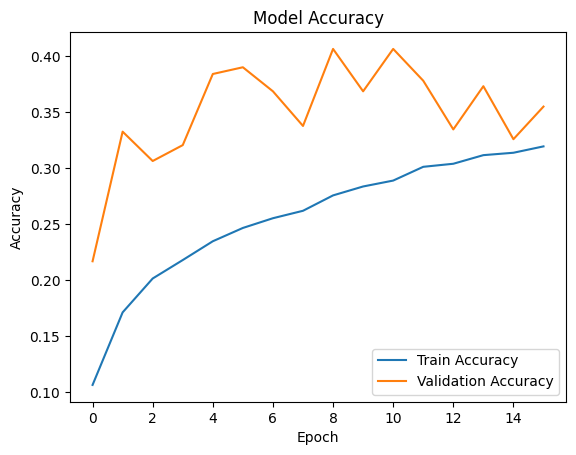

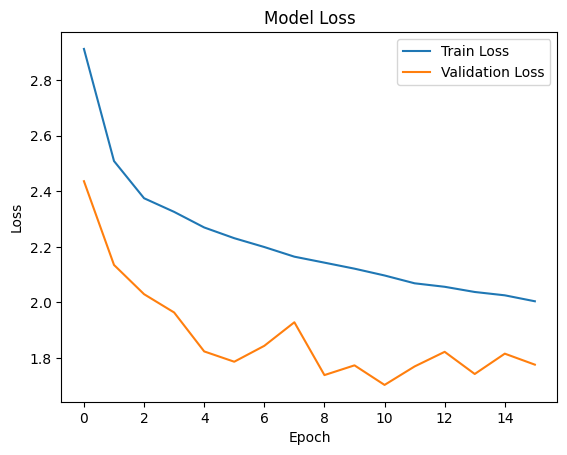

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
############### doing this again

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [52]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))       # First hidden layer
model.add(Dense(64, activation='relu'))        # Second hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer


In [53]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))  # Add dropout after layers


In [54]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [56]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)


In [57]:
# Fit the model with callbacks
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0712 - loss: 3.1848 - val_accuracy: 0.0962 - val_loss: 2.9890
Epoch 2/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0936 - loss: 3.0066 - val_accuracy: 0.1320 - val_loss: 2.7043
Epoch 3/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0993 - loss: 2.8805 - val_accuracy: 0.1836 - val_loss: 2.6034
Epoch 4/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1098 - loss: 2.8490 - val_accuracy: 0.1566 - val_loss: 2.6580
Epoch 5/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1120 - loss: 2.8168 - val_accuracy: 0.1945 - val_loss: 2.5417
Epoch 6/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1139 - loss: 2.8124 - val_accuracy: 0.2082 - val_loss: 2.4711
Epoch 7/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1188 - loss: 2.7964 - val_accuracy: 0.1907 - val_loss: 2.5164
Epoch 8/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1162 - loss: 2.8023 - val_accu

In [58]:
optimizer = Adam(learning_rate=0.0001)  # Try a smaller learning rate


In [59]:
model.add(Dense(256, activation='relu'))  # Increase neurons in a layer
model.add(Dense(128, activation='relu'))  # Add another hidden layer


In [60]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))  # Increase dropout rate if overfitting occurs


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))  # Increased layer size
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(128, activation='relu'))  # Additional hidden layer
model.add(Dropout(0.5))  # Dropout
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with callbacks
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                    epochs=100, batch_size=32, callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0713 - loss: 3.1925 - val_accuracy: 0.2040 - val_loss: 2.8543
Epoch 2/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1505 - loss: 2.8589 - val_accuracy: 0.3081 - val_loss: 2.4567
Epoch 3/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2264 - loss: 2.5419 - val_accuracy: 0.4342 - val_loss: 2.0868
Epoch 4/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2933 - loss: 2.2645 - val_accuracy: 0.4930 - val_loss: 1.8232
Epoch 5/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3445 - loss: 2.0588 - val_accuracy: 0.5358 - val_loss: 1.6344
Epoch 6/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3831 - loss: 1.8990 - val_accuracy: 0.5708 - val_loss: 1.4967
Epoch 7/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4289 - loss: 1.7712 - val_accuracy: 0.6094 - val_loss: 1.3658
Epoch 8/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4572 - loss: 1.6594 - val_accu

In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [65]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.8231
Test Accuracy: 0.7844, Test Loss: 0.7855


In [66]:
from sklearn.metrics import classification_report

# Assuming y_test are the true labels and y_pred are the model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       331
           1       1.00      0.86      0.93       432
           2       0.98      0.99      0.99       310
           3       0.92      0.91      0.92       245
           4       0.86      0.94      0.90       498
           5       0.90      0.91      0.91       247
           6       0.88      0.73      0.80       348
           7       0.92      0.91      0.91       436
           8       0.72      0.71      0.72       288
          10       0.86      0.66      0.75       331
          11       0.77      0.97      0.86       209
          12       0.74      0.73      0.73       394
          13       0.82      0.47      0.60       291
          14       0.81      0.76      0.78       246
          15       0.97      1.00      0.98       347
          16       0.55      0.87      0.67       164
          17       0.36      0.72      0

C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

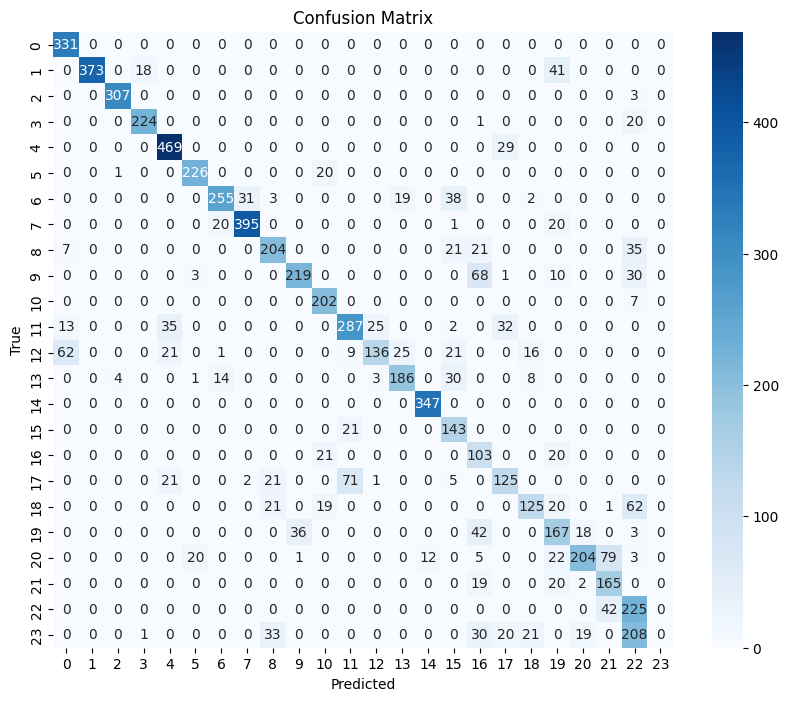

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [68]:
model.save('final_model.keras')
